# Blend Observer

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table
import matplotlib.image as mpimg
import os
import sep

## Noiseless Simulations

In [154]:
blended_noiseless =  np.load('./axel_sims/blended/gal_obj_0.npy',allow_pickle=True)

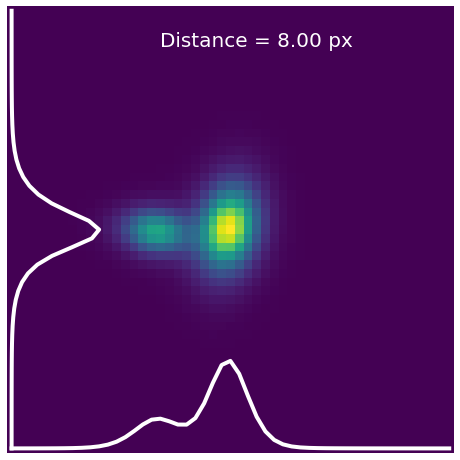

In [155]:
plt.figure(figsize=(8,16))

galno = 380
distance = np.sqrt(np.sum(np.array([blended_noiseless[galno]['blend_param']['dx'],
               blended_noiseless[galno]['blend_param']['dy']])**2) )


image_array = blended_noiseless[galno]['galsim_image'][0].array
size=len(image_array)


plt.imshow(image_array,origin="lower")

integrate_horizontal = image_array.sum(axis=0)
plt.plot(np.arange(size),10*integrate_horizontal/max(integrate_horizontal),color='white',lw=4)
integrate_vertical = image_array.sum(axis=1)
plt.plot(10*integrate_vertical/max(integrate_vertical),np.arange(size),color='white',lw=4)
plt.axis('off')
plt.text(size/3,size*9/10,"Distance = {:.2f} px".format(distance),color='white',fontsize=20)
plt.savefig("simulated_galaxy_blend_{}.pdf".format(galno),bbox_inches='tight')

## Noisy Simulations

Noise = 5

        x                  y                  peak        
------------------ ------------------ --------------------
15.097744330685476  29.98245610426259  0.03529411926865578
17.498655914088328 22.477150519072566  0.04313725605607033
62.797647044770855  63.42823528393577   0.0470588244497776
49.922330152575746 2.5309933676162157   0.0470588244497776
44.319262823828474 6.6712247954688575   0.0470588244497776
 37.97023808662178 61.305059507519296   0.0470588244497776
 4.594752122497301 14.212244833624684  0.05098039284348488
 5.247657204527053  60.98995974373077  0.05098039284348488
  47.6374428635628  48.88949764047599  0.05098039284348488
  2.11183145267447  32.06158833839759  0.05098039284348488
49.031479455041804 38.890346231342484  0.05098039284348488
  6.00771604865878 0.9552469295068419 0.054901961237192154
  61.3952205231112 29.935661729986727 0.054901961237192154
1.6334056377080781  43.11930583953741  0.05882352963089943
 5.642778403471004 50.672546860073126  0.058823529630899

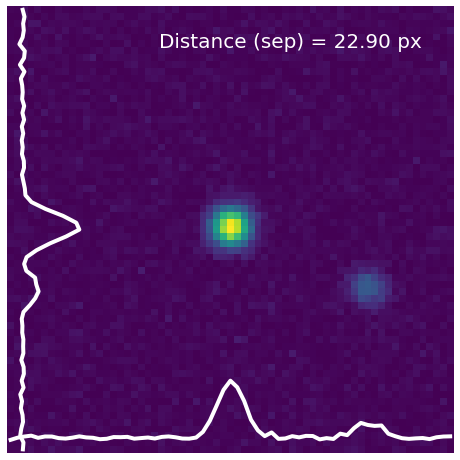

In [158]:
imagefiles_train=next(os.walk("bh_pad50/BlendHunterData/test/test"))[2]

plt.figure(figsize=(8,16))
galno = 7

image_array = plt.imread('bh_pad50/BlendHunterData/test/test/'+imagefiles_train[galno])

bkg = sep.Background(image_array)
sig_noise = bkg.globalrms
teste=sep.extract(image_array,1.5,sig_noise)
testable=Table(teste)
testable.sort('peak')
print(testable['x','y','peak'])
testable.reverse()
stamp_table=testable[0:2]
distance = np.sqrt(np.diff(stamp_table['x'])**2 + np.diff(stamp_table['y'])**2).data[0] 

size=len(image_array)

plt.imshow(image_array,origin="lower")

integrate_horizontal = image_array.sum(axis=0)
plt.plot(np.arange(size),10*integrate_horizontal/max(integrate_horizontal),color='white',lw=4)
integrate_vertical = image_array.sum(axis=1)
plt.plot(10*integrate_vertical/max(integrate_vertical),np.arange(size),color='white',lw=4)
plt.axis('off')
plt.text(size/3,size*9/10,"Distance (sep) = {:.2f} px".format(distance),color='white',fontsize=20)
plt.savefig("sim_image_noisy_5_{}.pdf".format(galno),bbox_inches='tight')

Noise = 15

        x                  y                 peak       
------------------ ------------------ ------------------
3.9152032644901347  9.149485171106903 0.4627451002597809
10.755610595327623 25.538066633674546 0.5098039507865906
 48.71472061691988  58.15758276320963 0.5215686559677124
53.023932178467966    33.808169422906 0.5254902243614197
40.108217777381185  6.647372120882397 0.5411764979362488
12.476034301405388  52.65249511709099 0.6705882549285889
 31.72261321171893  29.06123921952453                1.0


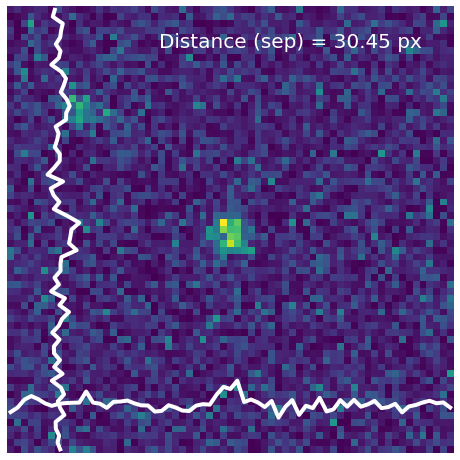

In [156]:
imagefiles_train=next(os.walk("bh_pad150/BlendHunterData/test/test"))[2]

plt.figure(figsize=(8,16))


image_array = plt.imread('bh_pad150/BlendHunterData/test/test/'+imagefiles_train[galno])

bkg = sep.Background(image_array)
sig_noise = bkg.globalrms
teste=sep.extract(image_array,1.5,sig_noise)
testable=Table(teste)
testable.sort('peak')
print(testable['x','y','peak'])
testable.reverse()
stamp_table=testable[0:2]
distance = np.sqrt(np.diff(stamp_table['x'])**2 + np.diff(stamp_table['y'])**2).data[0] 

size=len(image_array)

plt.imshow(image_array,origin="lower")

integrate_horizontal = image_array.sum(axis=0)
plt.plot(np.arange(size),10*integrate_horizontal/max(integrate_horizontal),color='white',lw=4)
integrate_vertical = image_array.sum(axis=1)
plt.plot(10*integrate_vertical/max(integrate_vertical),np.arange(size),color='white',lw=4)
plt.axis('off')
plt.text(size/3,size*9/10,"Distance (sep) = {:.2f} px".format(distance),color='white',fontsize=20)
plt.savefig("sim_image_noisy_15_{}.pdf".format(galno),bbox_inches='tight')

Noise = 35

        x                  y                 peak       
------------------ ------------------ ------------------
11.376870014099495  7.310102663904799 0.7686274647712708
 53.25746774865895 45.561077071015966 0.8313725590705872
 9.565751089776692  45.90889874555051 0.8627451062202454
 51.79629912767891   4.36598208172537 0.8823529481887817
 28.43914142770297 30.396566559155538 0.8823529481887817
30.086315199456592 51.299602656125046 0.8980392217636108
  36.4640467278947  19.35894302778773 0.9960784316062927


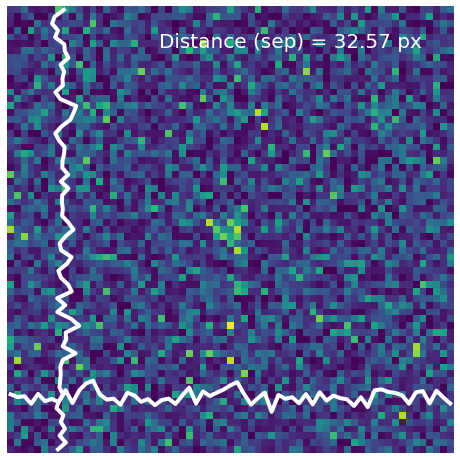

In [157]:
imagefiles_train=next(os.walk("bh_pad350/BlendHunterData/test/test"))[2]

plt.figure(figsize=(8,16))

image_array = plt.imread('bh_pad350/BlendHunterData/test/test/'+imagefiles_train[galno])

bkg = sep.Background(image_array)
sig_noise = bkg.globalrms
teste=sep.extract(image_array,1.5,sig_noise)
testable=Table(teste)
testable.sort('peak')
print(testable['x','y','peak'])
testable.reverse()
stamp_table=testable[0:2]
distance = np.sqrt(np.diff(stamp_table['x'])**2 + np.diff(stamp_table['y'])**2).data[0] 

size=len(image_array)

plt.imshow(image_array,origin="lower")

integrate_horizontal = image_array.sum(axis=0)
plt.plot(np.arange(size),10*integrate_horizontal/max(integrate_horizontal),color='white',lw=4)
integrate_vertical = image_array.sum(axis=1)
plt.plot(10*integrate_vertical/max(integrate_vertical),np.arange(size),color='white',lw=4)
plt.axis('off')
plt.text(size/3,size*9/10,"Distance (sep) = {:.2f} px".format(distance),color='white',fontsize=20)
plt.savefig("sim_image_noisy_35_{}.pdf".format(galno),bbox_inches='tight')

## Cosmos Images

In [133]:
imagefiles_train=next(os.walk("cosmos_data_pad/BlendHunterData/test/test"))[2]
cosmos_sep_res = np.load("cosmos_sep_res.npy",allow_pickle="True")

        x                  y                 peak       
------------------ ------------------ ------------------
 26.49149360530937 11.646085987498914 195.55747985839844
24.770326655778423 24.751871625455525  87.56077575683594


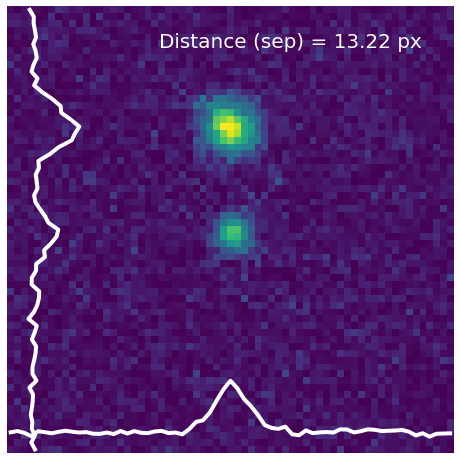

In [153]:
plt.figure(figsize=(8,16))

galno = 125

image_array = plt.imread('cosmos_data_pad/BlendHunterData/test/test/'+imagefiles_train[galno])
stamp_table = Table(cosmos_sep_res[galno])
print(stamp_table['x','y','peak'])
distance = np.sqrt(np.diff(stamp_table['x'])**2 + np.diff(stamp_table['y'])**2).data[0] 



size=len(image_array)

plt.imshow(image_array,origin="lower")

integrate_horizontal = image_array.sum(axis=0)
plt.plot(np.arange(size),10*integrate_horizontal/max(integrate_horizontal),color='white',lw=4)
integrate_vertical = image_array.sum(axis=1)
plt.plot(10*integrate_vertical/max(integrate_vertical),np.arange(size),color='white',lw=4)
plt.axis('off')
plt.text(size/3,size*9/10,"Distance (sep) = {:.2f} px".format(distance),color='white',fontsize=20)
plt.savefig("cosmos_image_{}.pdf".format(galno),bbox_inches='tight')